# Zufallszahlen Erzeugen

## Vertiefung

### Übersicht

1. Middle-Square-Methode mit $n$-stelligen Zahlen
2. Mapping auf das Einheitsintervall 
3. NumPy Random
4. Inversionsmethode (Inverse Transform Sampling)

In [1]:
import numpy as np
import matplotlib.pyplot as plt


### Middle-Square-Methode mit $n$-stelligen Zahlen

In der Einarbeitung haben wir die Middle-Square-Methode mit 4-stelligen Zahlen kennengelernt. Diese Methode lässt sich auch auf eine beliebige Anzahl Stellen verallgemeinern. Es muss aber eine gerade Anzahl sein.

In [2]:
def msm_next_4(number):
    """Ein Schritt der Middle-Square-Method für 4-stellige Zahlen."""
    n2_padded = str(number**2).zfill(8)
    return int(n2_padded[2:-2])


def msm_next(number, n_digits):
    """Ein Schritt der Middle-Square-Method für beliebig-stellige Zahlen."""
    assert n_digits % 2 == 0  # n_digits must be even
    assert len(str(number)) <= n_digits  # number cannot must more than n_digits digits
    n_digits_half = n_digits // 2
    n2_padded = str(number**2).zfill(n_digits * 2)
    return int(n2_padded[n_digits_half:-n_digits_half])


# msm_next(234534512346, 12)


In [3]:
def msm(seed, n):
    """Middle-Square-Method mit Seed und Anzahl Schritten n"""
    n_digits = len(str(seed))
    number = seed
    sequence = []
    for _ in range(n):
        number = msm_next(number, n_digits)
        sequence.append(number)
    return np.array(sequence)


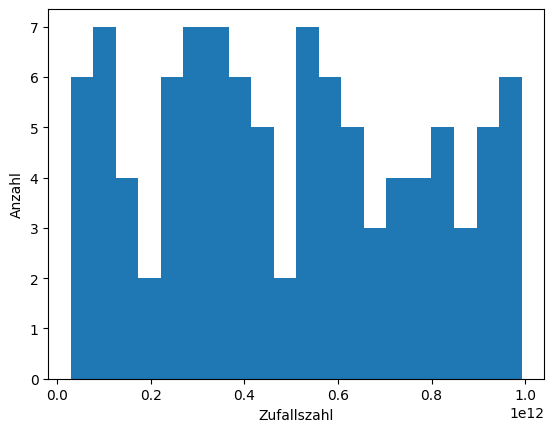

In [4]:
x = msm(234534512346, 100)

plt.hist(x, bins=20)
plt.xlabel("Zufallszahl")
plt.ylabel("Anzahl")
plt.show()


#### Maximale Periodenlänge

In [5]:
def msm_period(seed):
    n_digits = len(str(seed))
    number = seed
    sequence_set = set()
    while number not in sequence_set:
        sequence_set.add(number)
        number = msm_next(number, n_digits)
    period = len(sequence_set)
    return period, number


In [6]:
# Für 2-stellige Seeds
periods_2_digits = [(seed, msm_period(seed)[0]) for seed in range(10, 100)]
max_seed_2_digits, max_period_2_digits = max(periods_2_digits, key=lambda x: x[1])
print(
    f"Die maximale Periode für 2-stellige Seeds ist {max_period_2_digits} und wird erreicht bei Seed {max_seed_2_digits}."
)

# Für 4-stellige Seeds
periods_4_digits = [(seed, msm_period(seed)[0]) for seed in range(1000, 10000)]
max_seed_4_digits, max_period_4_digits = max(periods_4_digits, key=lambda x: x[1])
print(
    f"Die maximale Periode für 4-stellige Seeds ist {max_period_4_digits} und wird erreicht bei Seed {max_seed_4_digits}."
)

# Für 6-stellige Seeds (läuft ca. 5 min!)
periods_6_digits = [(seed, msm_period(seed)[0]) for seed in range(100000, 1000000)]
max_seed_6_digits, max_period_6_digits = max(periods_6_digits, key=lambda x: x[1])
print(
    f"Die maximale Periode für 6-stellige Seeds ist {max_period_6_digits} und wird erreicht bei Seed {max_seed_6_digits}."
)


Die maximale Periode für 2-stellige Seeds ist 15 und wird erreicht bei Seed 42.
Die maximale Periode für 4-stellige Seeds ist 111 und wird erreicht bei Seed 6239.
Die maximale Periode für 6-stellige Seeds ist 943 und wird erreicht bei Seed 229339.


### Mapping auf das Einheitsintervall

Der MSM Algorithmus (wie bessere Algorithmen auch) erzeugt ganzzahlige Zufallszahlen, die Gleichverteilt sind. Diese müssen für viele Anwendungen zuerst auf das Einheitsintervall von 0 bis 1 abgebildet werden. Je nach Konvention wird das Intervall entweder inklusive oder exklusive der Grenzen betrachtet. Wir folgen hier der Konvention von NumPy und nehmen das halb-offene Intervall, siehe [`numpy.random.Generator.uniform`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html).

$$
    X \sim U(1,0)
    \quad \Rightarrow \quad
    f(x) = \begin{cases}
        1 & \text{für } x \in [0,1) \\
        0 & \text{sonst}
    \end{cases}
$$

Hier steht $U(0,1)$ für die Gleichverteilung auf dem Intervall $[0,1)$ und $f(x)$ für die Wahrscheinlichkeitsdichte.

In [7]:
def uniform(seed, n):
    numbers = msm(seed, n)
    upper_bound = 10 ** len(str(seed))
    return numbers / upper_bound


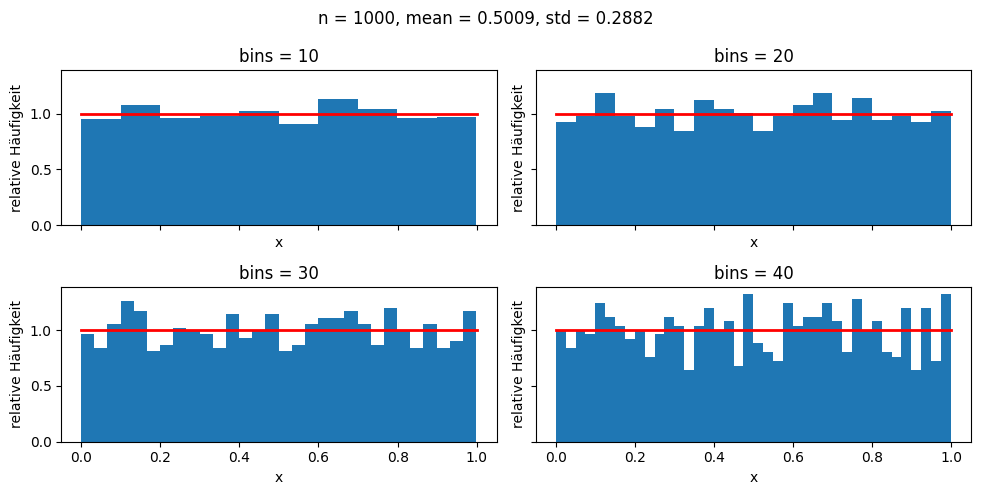

In [8]:
u = uniform(9018723491827345, 1_000)

fig, axes = plt.subplots(2, 2, figsize=(10, 5), sharex=True, sharey=True)
for ax, bins in zip(axes.flat, (10, 20, 30, 40)):
    ax.hist(u, bins=bins, density=True)
    ax.plot([0, 1], [1, 1], color="red", linewidth=2)
    ax.set_xlabel("x")
    ax.set_ylabel("relative Häufigkeit")
    ax.set_title(f"bins = {bins}")
plt.suptitle(f"n = {len(u)}, mean = {u.mean():.4f}, std = {u.std():.4f}")
plt.tight_layout()
plt.show()


### NumPy Random

Der Einstiegspunkt in die Dokumentation ist hier: https://numpy.org/doc/stable/reference/random/index.html

Grundsätzlich wird zuerst ein [Random Generator](https://numpy.org/doc/stable/reference/random/generator.html) mit einem Seed instanziert und dann für die Erzeugung von Pseudozufallszahlen verwendet

#### Gleichverteilung

In [9]:
rng = np.random.default_rng(12345678)
u = rng.uniform(0, 1, 1_000)


#### Weitere Verteilungen

Der NumPy Random Generator bietet eine grosse [Auswahl Verteilungen](https://numpy.org/doc/stable/reference/random/generator.html#distributions) an. Scipy bietet noch [weitere Verteilungen](https://docs.scipy.org/doc/scipy/reference/stats.html) an, unter anderem auch [multivariate Verteilungen](https://docs.scipy.org/doc/scipy/reference/stats.html#multivariate-distributions).

Beispiel: [Gammaverteilung](https://de.wikipedia.org/wiki/Gammaverteilung) mit [`rng.gamma`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.gamma.html)

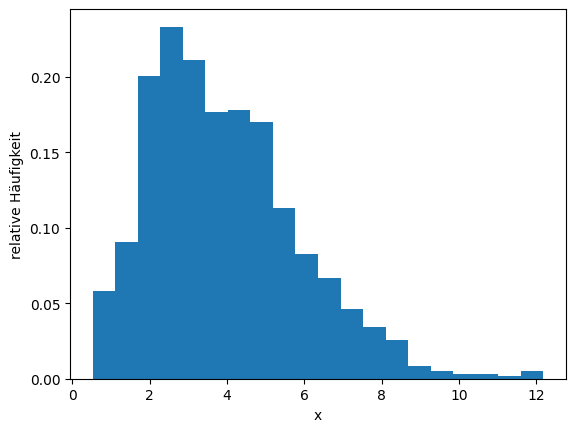

In [10]:
rng = np.random.default_rng(39485928374)
g = rng.gamma(4, 1, 1_000)

plt.hist(g, bins=20, density=True)
plt.xlabel("x")
plt.ylabel("relative Häufigkeit")
plt.show()


#### Mischen

- [`rng.shuffle`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html)	
- [`rng.permutation`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html)
- [`rng.permuted`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permuted.html)

Vorsicht: Dokumentation genau lesen.

- `rng.shuffle` verändern das Array inplace (Mutation!), `rng.permuted` und `rng.permutation` gibt ein neues Array zurück.
- `rng.shuffle` und `rng.permutation` mischen das Array entlang einer Achse (default `axis=0`). Das heisst, es werden nur Zeilen (bzw. Spalten) vertauscht aber nicht die Elemente innerhalb einer Zeile (bzw. Spalte).
- `rng.permuted` mischt das ganze Array.

In [11]:
rng = np.random.default_rng(42)
x = np.arange(8).reshape(4, 2)

print(rng.shuffle(x))
print("\n", x)


None

 [[6 7]
 [4 5]
 [2 3]
 [0 1]]


In [12]:
rng = np.random.default_rng(42)
x = np.arange(8).reshape(4, 2)

print(rng.permutation(x))
print("\n", x)


[[6 7]
 [4 5]
 [2 3]
 [0 1]]

 [[0 1]
 [2 3]
 [4 5]
 [6 7]]


In [13]:
rng = np.random.default_rng(42)
x = np.arange(8).reshape(4, 2)

print(rng.permuted(x))
print("\n", x)


[[3 4]
 [2 7]
 [6 1]
 [5 0]]

 [[0 1]
 [2 3]
 [4 5]
 [6 7]]


#### Auswählen

Samples aus einer Menge zieht man mit [`rng.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html) entweder mit oder ohnr zurücklegen `replace=True/False`.

In [14]:
rng = np.random.default_rng(42)
x = np.arange(8)

rng.choice(x, size=99)


array([0, 6, 5, 3, 3, 6, 0, 5, 1, 0, 4, 7, 5, 6, 5, 6, 4, 1, 6, 3, 4, 2,
       1, 7, 6, 5, 3, 6, 4, 3, 3, 1, 0, 4, 7, 0, 6, 6, 2, 5, 1, 6, 5, 2,
       0, 7, 3, 7, 5, 6, 6, 1, 2, 3, 3, 0, 4, 1, 5, 5, 7, 5, 2, 7, 3, 2,
       7, 2, 0, 3, 6, 1, 3, 1, 5, 3, 2, 1, 4, 5, 7, 3, 1, 6, 5, 5, 0, 2,
       6, 6, 3, 6, 6, 3, 7, 2, 1, 5, 5])

In [15]:
rng = np.random.default_rng(42)
x = np.arange(8)

rng.choice(x, size=6, replace=False)


array([4, 3, 6, 7, 2, 0])

### Inversionsmethode (Inverse Transform Sampling)

Wie werden nun Verteilungen erzeugt, die nicht Gleichverteilungen sind? Die einfachsten Verfahren sind:

- [Inversionsmethode](https://de.wikipedia.org/wiki/Inversionsmethode)
- [Verwerfungsmethode](https://de.wikipedia.org/wiki/Verwerfungsmethode)

Hier diskutieren und implementieren wir die Inversionsmethode für [diskrete Verteilungen](https://de.wikipedia.org/wiki/Diskrete_Wahrscheinlichkeitsverteilung). Die Inversionsmethode für [stetige Verteilungen](https://de.wikipedia.org/wiki/Stetige_Wahrscheinlichkeitsverteilung) wird im Übungsblatt implementiert und kam bereits im Modul "Statistik & Wahrscheinlichkeit" vor (Serie 3, Aufgabe 3c).

Als Beispiel schauen wir an, welche Farbe wohl eine Verkehrsampel anzeigt, wenn man bei ihr ankommt. Wenn die Ampel immer 10 Sekunden auf grün steht, 20 Sekunden auf rot und dazwischen je 1 Sekunden auf Orange, dann ist die Wahrscheinlichkeit folgendermassen

$$
\begin{align*}
    P(\text{grün}) &= \frac{10}{32} \,,\qquad&
    P(\text{rot}) &= \frac{20}{32} \,,\qquad&
    P(\text{orange}) &= \frac{2}{32}
\end{align*}
$$

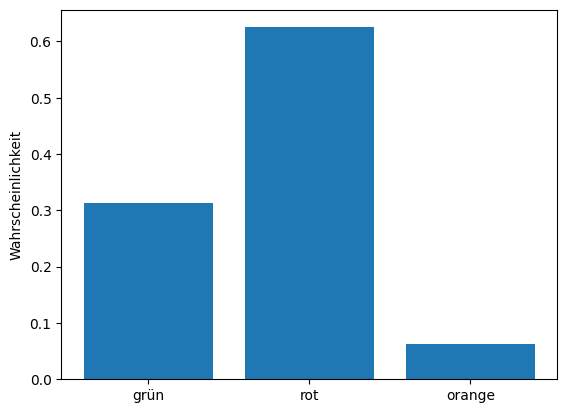

In [16]:
probabilities = {
    "grün": 10 / 32,
    "rot": 20 / 32,
    "orange": 2 / 32,
}

x = np.array(list(probabilities.keys()))
pdf = np.array(list(probabilities.values()))

plt.bar(x, pdf)
plt.ylabel("Wahrscheinlichkeit")
plt.show()


Das Ziel ist nun, Realisierungen der Zufallsvariable mit Wahrscheinlichkeit $P(x)$ und $x\in\{\text{grün}, \text{rot}, \text{orange}\}$ zu erzeugen.

In [17]:
rng = np.random.default_rng(42)


In [18]:
# Auf Wahrscheinlichkeit für grün würfeln

r = rng.uniform()
if r < probabilities["grün"]:
    print("grün")
else:
    print("rot oder orange")


rot oder orange


Wie bestimmt man, welches Licht an ist, wenn nicht das grüne?

Dazu schauen wir die kumulative Verteilungsfunktion (CDF) an.

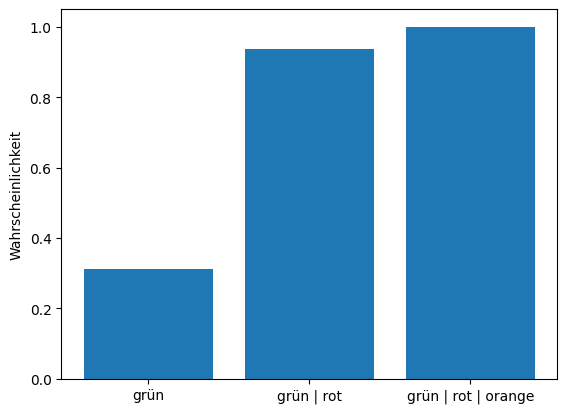

In [19]:
# Kumulative Verteilungsfunktion
# pdf = [10,    20,       2] / 32
# cdf = [10, 10+20, 10+20+2] / 32

cdf = np.cumsum(pdf)
xx = ["grün", "grün | rot", "grün | rot | orange"]

plt.bar(xx, cdf)
plt.ylabel("Wahrscheinlichkeit")
plt.show()


In [20]:
r = rng.uniform(0, 1)
cdf, r, np.searchsorted(cdf, r)


(array([0.3125, 0.9375, 1.    ]), 0.4388784397520523, 1)

(array([0.93  , 0.4845, 0.0855]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

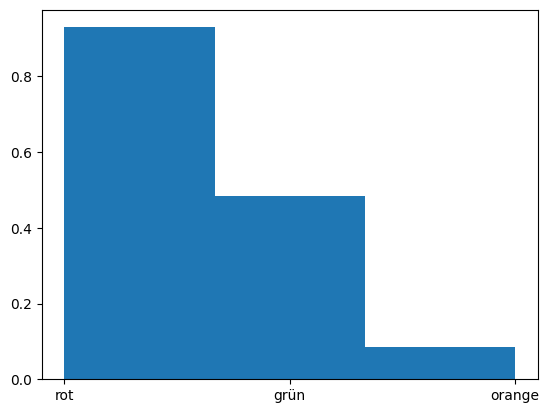

In [21]:
r = rng.uniform(0, 1, 1000)
i = np.searchsorted(cdf, r)
lights = x[i]

plt.hist(lights, bins=3, density=True)


#### Direkte Variante mit `rng.choice`

(array([0.4545, 0.942 , 0.1035]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

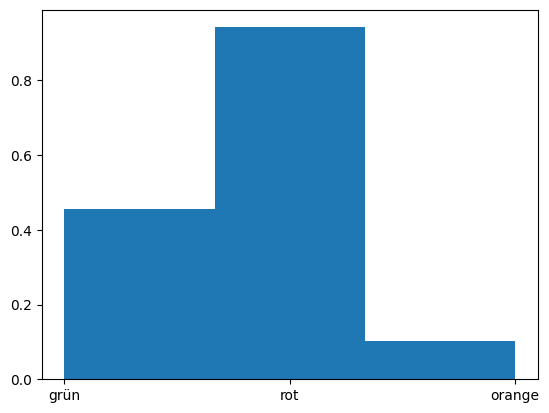

In [22]:
lights = rng.choice(x, size=1000, p=pdf)
plt.hist(lights, bins=3, density=True)


### Alternative: Verwerfungsmethode (Rejection Sampling)

Optionale Übung: Implementiere die Verwerfungsmethode für die Gamma-Verteilung

- ["Zufallszahlen generieren: Verwerfungsmethode 01: Die Idee" - LernenInVerschiedenenFormen](https://www.youtube.com/watch?v=il9W8vdESX0)
- ["Zufallszahlen generieren: Verwerfungsmethode 02: Algorithmus" - LernenInVerschiedenenFormen](https://www.youtube.com/watch?v=SaHA_NhELIo)